In [117]:
from sklearn.model_selection import cross_val_predict
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [118]:
os.chdir('C:/Users/Gary/Documents/Python Scripts/House prices')

In [119]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [80]:
# Dropping the variables displayed above
train=train.drop(['GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','LotFrontage'],axis=1)
test=test.drop(['GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','LotFrontage'],axis=1)


In [4]:
# training dataset
x_train = train.loc[:, train.columns != 'Id']
x_train = x_train.loc[:, x_train.columns != 'SalePrice']
y_train = train.loc[:, train.columns == 'SalePrice']

In [5]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [7]:
train[train["LandContour"]=="Lvl"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [12]:
train.shape

(1460, 81)

In [32]:
train['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

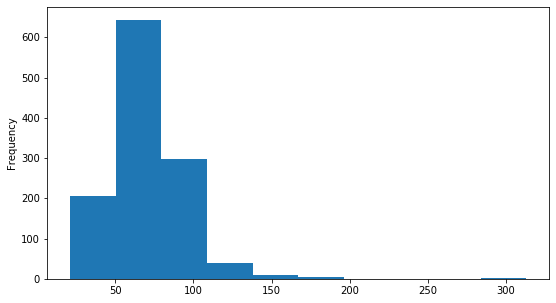

In [120]:
plt.figure(figsize = (9, 5)) 
train['LotFrontage'].plot(kind ="hist") 

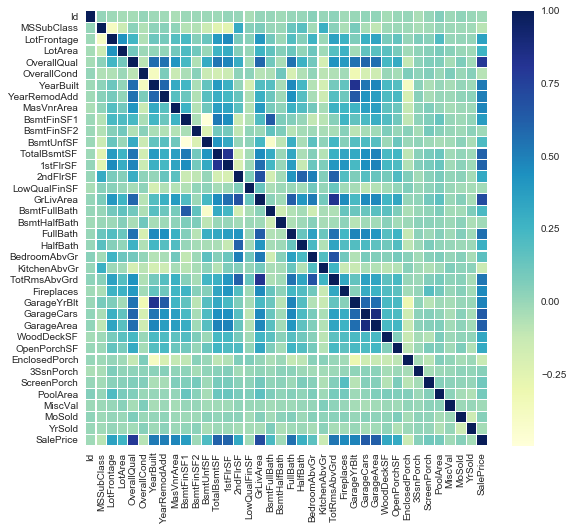

In [9]:
# make a correlation matrix

corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

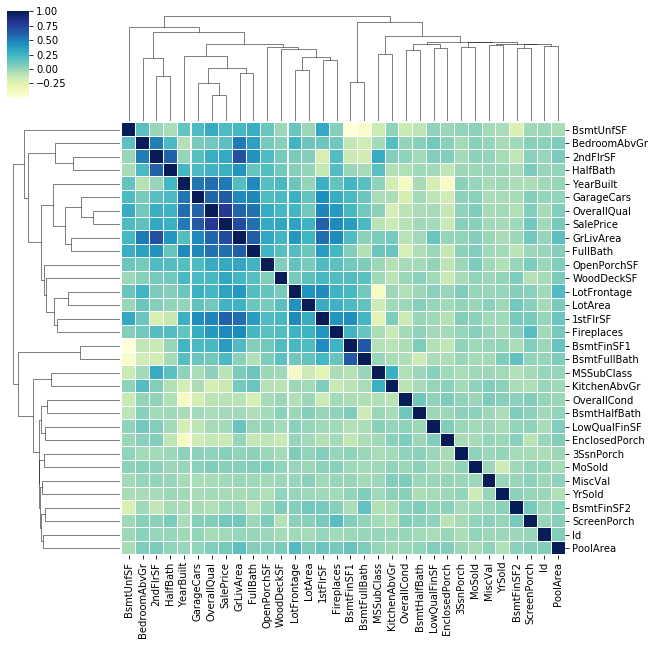

In [35]:

corrmat = train.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [34]:
# saleprice correlation matrix 
# k : number of variables for heatmap 
k = 30
  
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
  
cm = np.corrcoef(train[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 


KeyError: "['MasVnrArea', 'YearRemodAdd'] not in index"

Based on the correlation matrix, there is a high correlation between
    1. Garage cars(GarageCars) and Garage area(GarageArea) - We will keep Garage Cars
    2. Total Basement area (TotalBsmtSF) and 1st floor area(1stFlrSF) - We will keep 1st floor area
    3. Year built(YearBuilt) and Garage year built(GarageYrBlt) - we will keep year built
    4. Total rooms above ground(TotRmsAbvGrd) and Living area above ground (GrLivArea) - we will keep GrLivArea 

In [36]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

C:\Users\Gary\Anaconda4\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Gary\Anaconda4\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


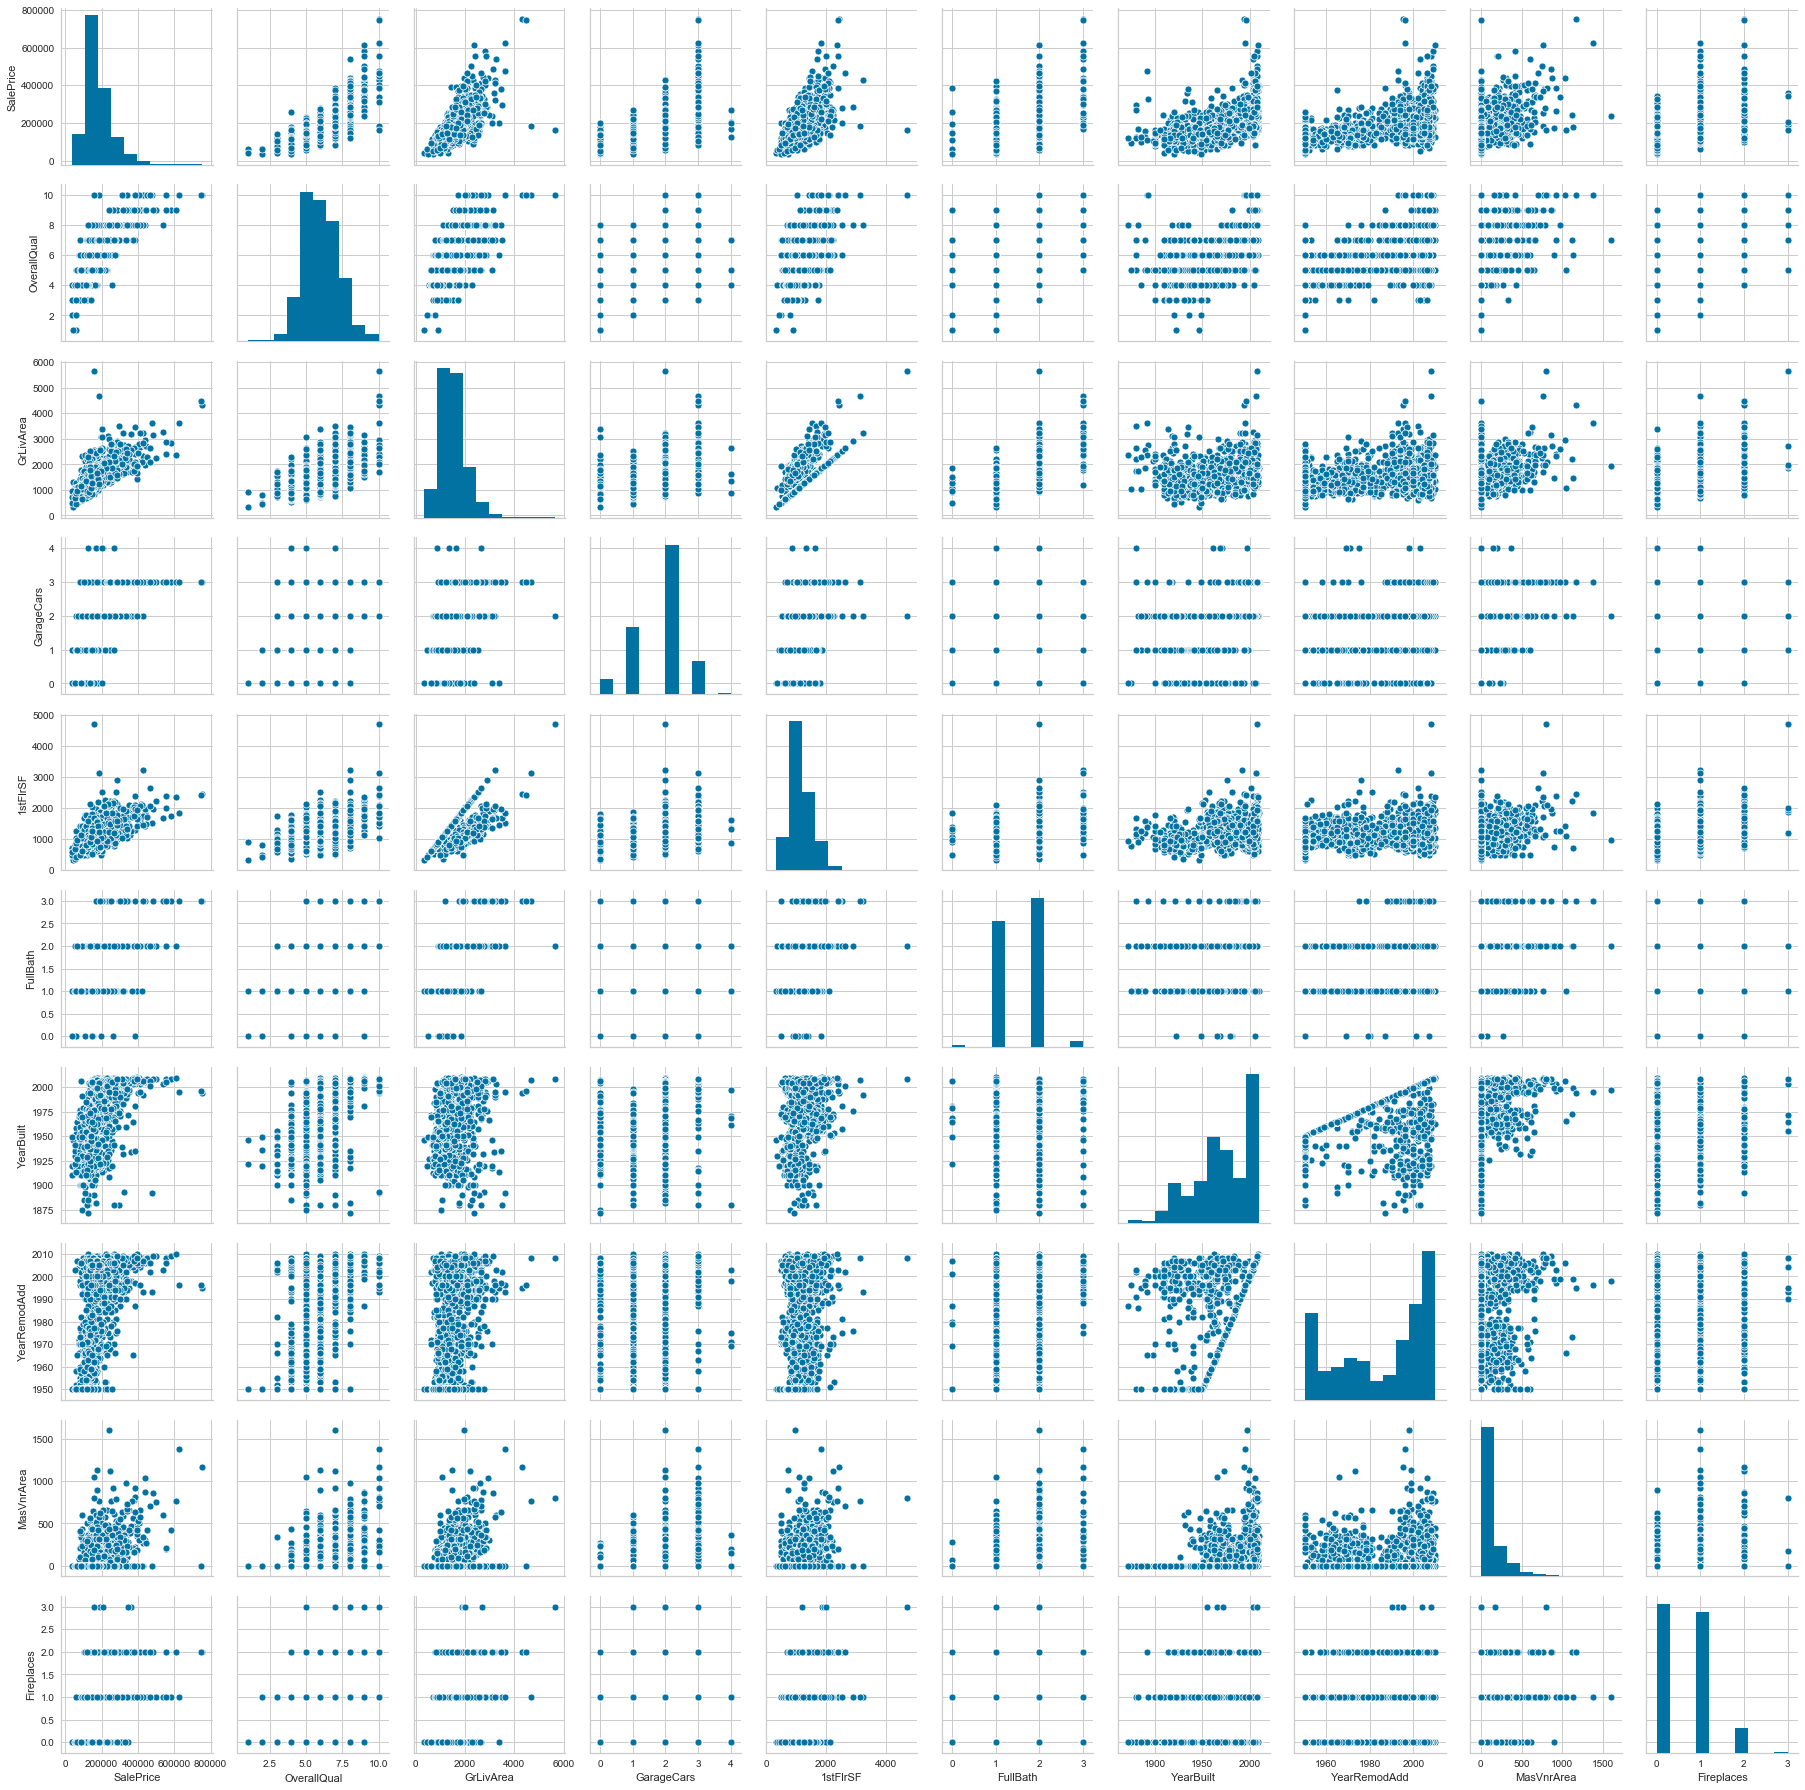

In [42]:
sns.pairplot(train[cols])

In [43]:
df=train

In [30]:
# Dropping the variables displayed above
train=train.drop(['GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea'],axis=1)
test=test.drop(['GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea'],axis=1)


KeyError: "['GarageArea' 'TotalBsmtSF' 'GarageYrBlt' 'TotRmsAbvGrd'] not found in axis"

In [57]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch'

In [6]:
# training dataset
x_train = train.loc[:, train.columns != 'Id']
x_train = x_train.loc[:, x_train.columns != 'SalePrice']
y_train = train.loc[:, train.columns == 'SalePrice']

In [84]:
# variables that have a lot of nulls

train.isnull().sum()[train.isnull().sum()!=0]/len(train)*100


LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

The variables above have missing values. We will examine them one by one to determine if we will be dropping them or inputting them.
LotFrontage     17.739726 - Not clear what to do with it
Alley           93.767123 - Remove - too few observations, not useful
MasVnrType       0.547945 - Keep   - assign None because it is the most common value
MasVnrArea       0.547945 - Keep   - assign 0 because it is the equivalent of None
BsmtQual         2.534247 - Keep   - assign No basement
BsmtCond         2.534247 - Keep   - assign No basement
BsmtExposure     2.602740 - Keep   - assign No basement
BsmtFinType1     2.534247 - Keep   - assign No basement
BsmtFinType2     2.602740 - Keep   - assign No basement
Electrical       0.068493 - Keep   - assign mean
FireplaceQu     47.260274 - Keep   - Assume NA as no fireplace. We assume lack of data is no fireplace.
GarageType       5.547945 - Keep   - assign no garage
GarageFinish     5.547945 - Keep   - assign no garage
GarageQual       5.547945 - Keep   - assign no garage
GarageCond       5.547945 - Keep   - assign no garage
PoolQC          99.520548 - Remove - too few observations, not useful
Fence           80.753425 - Keep   - Assume NA as no fence. We assume lack of data is no fence
MiscFeature     96.301370 - Remove - too observations, not meaningful observations 


In [115]:
test.isnull().sum()[test.isnull().sum()!=0]/len(test)*100

MSZoning         0.274160
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageFinish     5.346127
GarageCars       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [162]:
#Filling NAs
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])


### Handling categorical variables

In [156]:
train['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

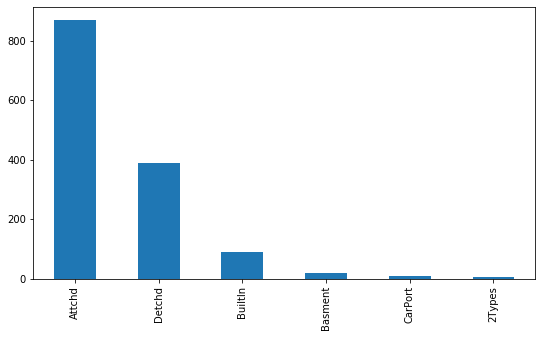

In [157]:
plt.figure(figsize = (9, 5)) 
train['GarageType'].value_counts().plot(kind='bar')

In [145]:
train[train['BsmtExposure']==0]['MasVnrType'].isnull().describe()
#train[['Fireplaces','FireplaceQu']]

count     0
unique    0
Name: MasVnrType, dtype: int64

In [146]:
#train[train['MasVnrType']=='None'][['MasVnrType','MasVnrArea']]

In [155]:
train[train['BsmtExposure'].isnull()][train[train['BsmtExposure'].isnull()]['BsmtCond'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


### Handling numerical variables

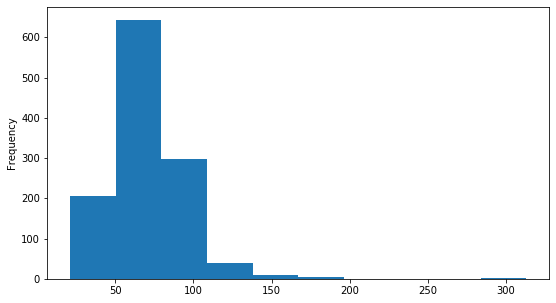

In [121]:
plt.figure(figsize = (9, 5)) 
train['LotFrontage'].plot(kind ="hist") 

In [129]:
train[train['LotFrontage'].isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000


# Model analysis

In [165]:
os.chdir('C:/Users/Gary/Documents/Python Scripts/House prices')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

# Dropping the variables displayed above
train=train.drop(['Id','Alley','GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','LotFrontage'],axis=1)
test=test.drop(['Alley','GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','LotFrontage'],axis=1)

In [129]:
# training dataset
df = train.loc[:, train.columns != 'SalePrice']
y = train.loc[:, train.columns == 'SalePrice']

#### Train/test split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [131]:
data=[X_train,y_train]
corrmat = train.corr() 
cols = corrmat.nlargest(6, 'SalePrice')['SalePrice'].index
cols=cols[1:]

In [132]:
X_train = X_train[cols]
X_test = X_test[cols]

In [133]:
from sklearn import datasets, linear_model

In [139]:
test[cols].isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
1stFlrSF       0
FullBath       0
dtype: int64

In [159]:
test['GarageCars'].fillna(0, inplace=True)

In [160]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
real_prediction = lm.predict(test[cols])

Text(0, 0.5, 'Predictions')

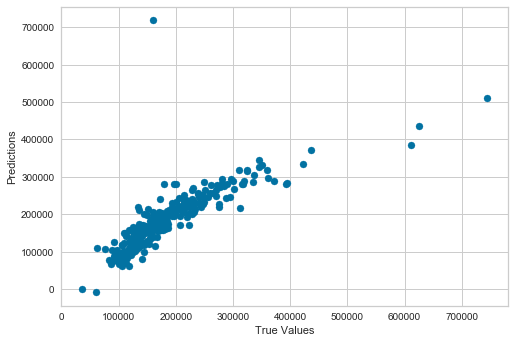

In [82]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

#### Plot of residuals

In [75]:
from yellowbrick.regressor import ResidualsPlot

ValueError: color kwarg must have one color per data set. 1168 data sets and 1 colors were provided

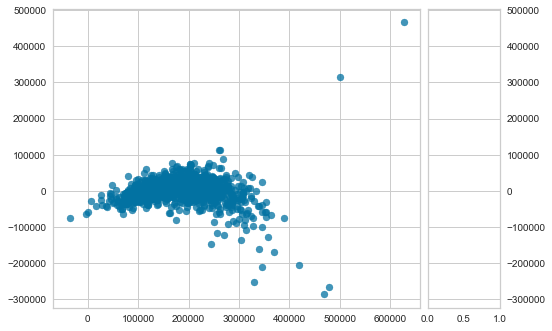

In [76]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

#### K-fold cross validation

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve

In [66]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[0.80034269 0.74232124 0.83055315 0.78547112 0.46426928]


### Feature selection

#### Variance threshold
It removes all the variables with a low variance

In [296]:
from sklearn.feature_selection import VarianceThreshold

In [302]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df)

(1460, 10)

#### Univariate feature selection

In [318]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [319]:
bestfeatures = SelectKBest(f_regression, k=10)
fit = bestfeatures.fit(X_train,y_train)


In [320]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs        Score
0   OverallQual  1918.771036
1     GrLivArea  1150.170218
2    GarageCars   833.315579
3      1stFlrSF   710.810187
4      FullBath   533.897446
5     YearBuilt   450.963745
6  YearRemodAdd   417.112757
7    MasVnrArea   372.810642
8    Fireplaces   324.212382
9    BsmtFinSF1   207.326686


In [164]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature

#### Select feature through regularisation and linear models

# Submission

In [181]:
type(test.Id)

pandas.core.series.Series

In [195]:
real_prediction=pd.DataFrame(real_prediction)
type(real_prediction[0])

pandas.core.series.Series

In [197]:
my_submission = pd.DataFrame({'Id': test['Id'], 'SalePrice':real_prediction[0]})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)